<a href="https://colab.research.google.com/github/BHARATH077/customer-churn-ml/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Data Exploration

import pandas as pd

# Load dataset directly from github
url = 'https://raw.githubusercontent.com/BHARATH077/customer-churn-ml/refs/heads/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)

# Basic checks
print("Dataset Shape:", df.shape) #rows, columns
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# Check target column
print("\nChurn value counts:", df['Churn'].value_counts())

Dataset Shape: (7043, 21)

Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

First 5 rows:
    custo

Missing Values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Summary Statistics for numerical features:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Cat

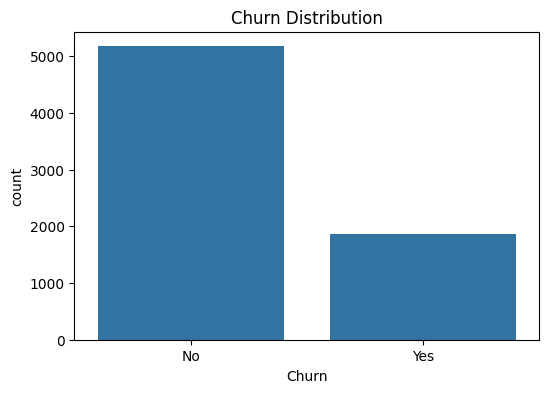

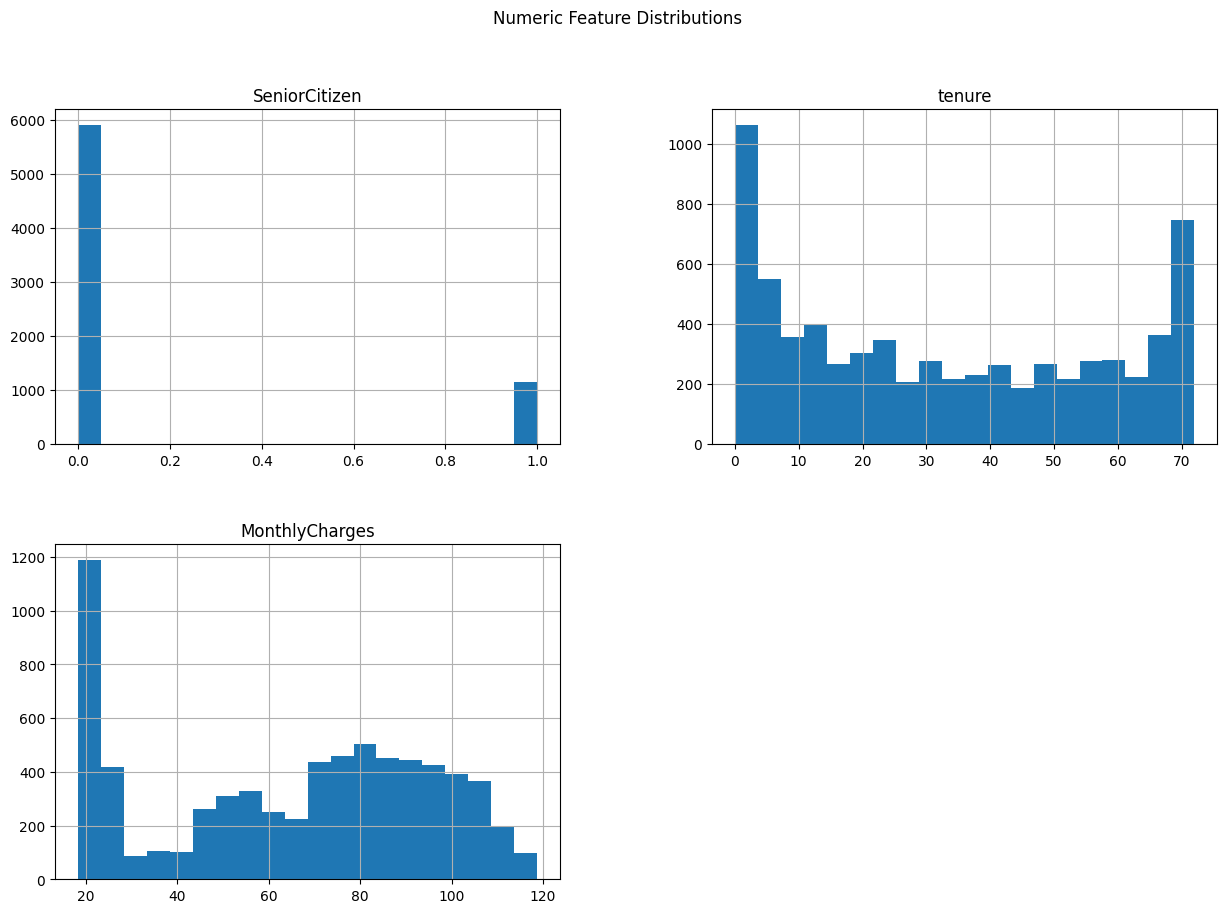

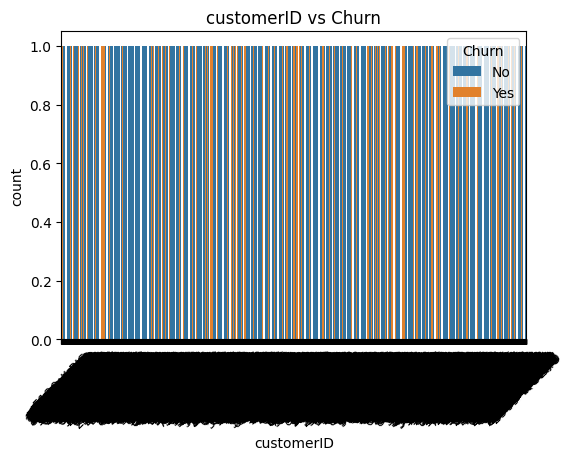

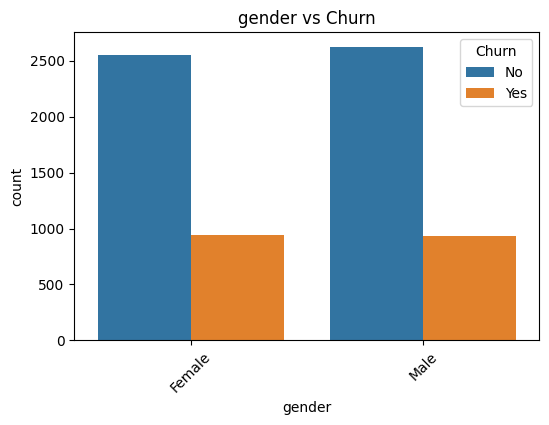

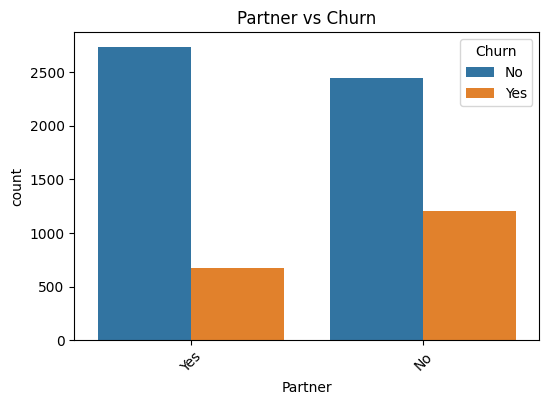

In [5]:
# Extended EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Missing Values
print("Missing Values per column:")
print(df.isnull().sum())

# Summary Stats
print("\nSummary Statistics for numerical features:")
print(df.describe())

# Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)

for col in categorical_cols:
  print(f"\nValue counts for {col}:")
  print(df[col].value_counts())

# Visualizations
plt.figure(figsize=(6,4))
sns.countplot(data = df, x='Churn')
plt.title("Churn Distribution")
plt.show()

# Histograms for Numerical features
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Numeric Feature Distributions")
plt.show()

# Bar plot for Categorical features (First 3 as example)
for col in categorical_cols[:3]:
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x=col, hue='Churn')
  plt.title(f"{col} vs Churn")
  plt.xticks(rotation=45)
  plt.show()


In [6]:
# Bivariate Analysis

Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn, dtype: float64


/tmp/ipython-input-2803879893.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="coolwarm")


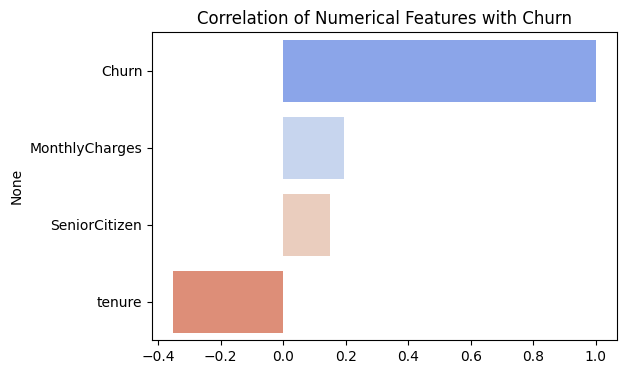

In [9]:
# Correlation Heatmap for Numeric Features and Churn

# Make a copy of data
df_corr = df.copy()

# Convert Churn to numeric
df_corr['Churn'] = df_corr["Churn"].map({'Yes':1, 'No':0})

# Select Numerical Features + Churn
num_cols = df_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute Correlation
corr = df_corr[num_cols].corr()

# Focus only on correlation with churn
churn_corr = corr["Churn"].sort_values(ascending=False)
print(churn_corr)

# Heatmap of correlations with churn
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="coolwarm")
plt.title("Correlation of Numerical Features with Churn")
plt.show()




# Insights
 - The correlation of Numerical Features vs Churn shows us that 'tenure' is negatively correlated with churn(Longer customers are less likely to churn).
- 'MonthlyCharges' and 'SeniorCitizen' has a weak positive correlation with churn.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


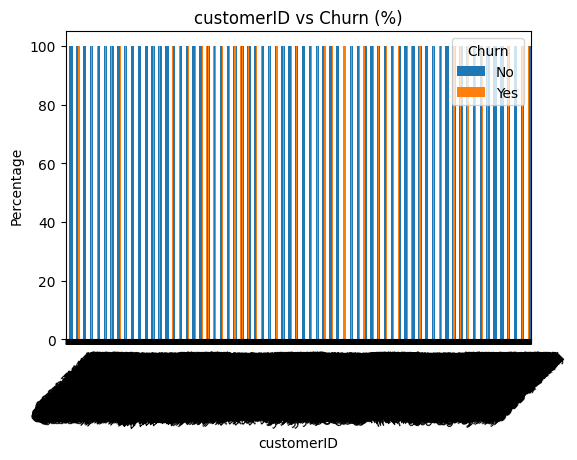

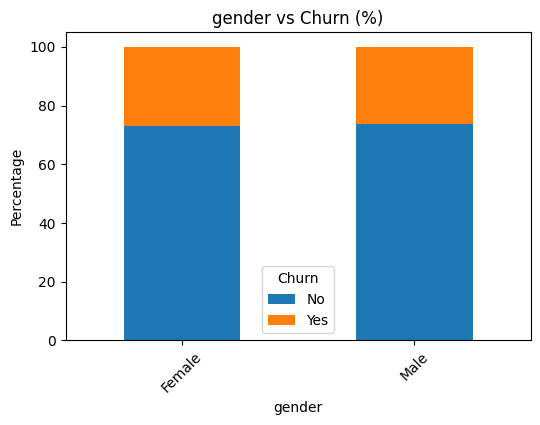

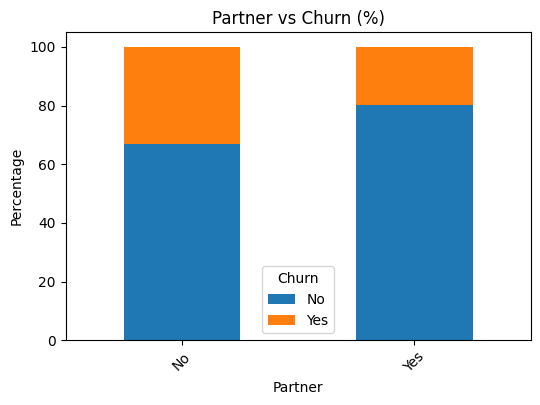

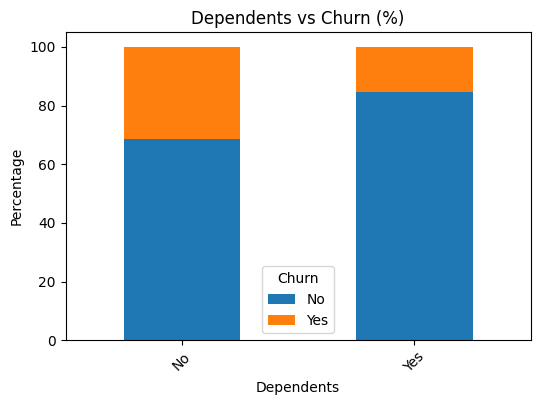

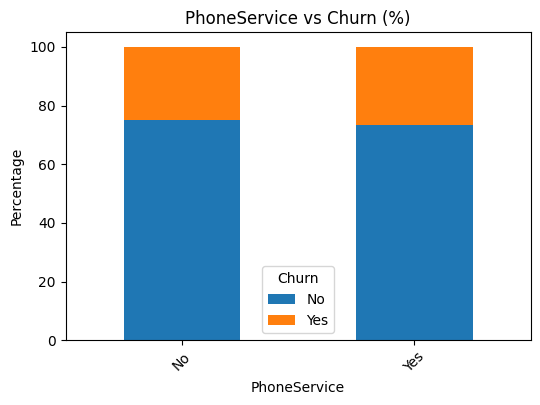

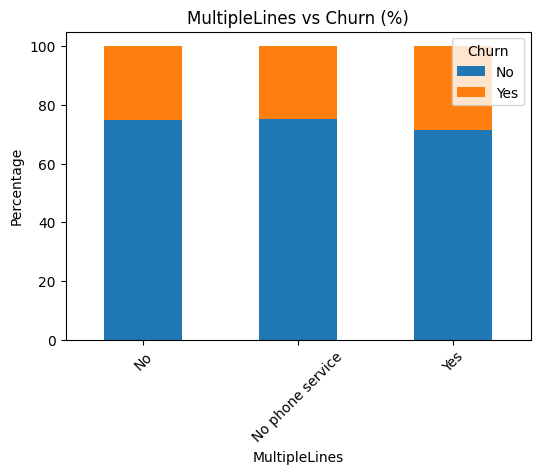

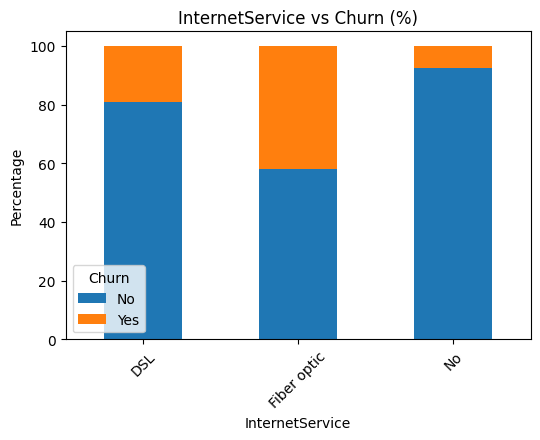

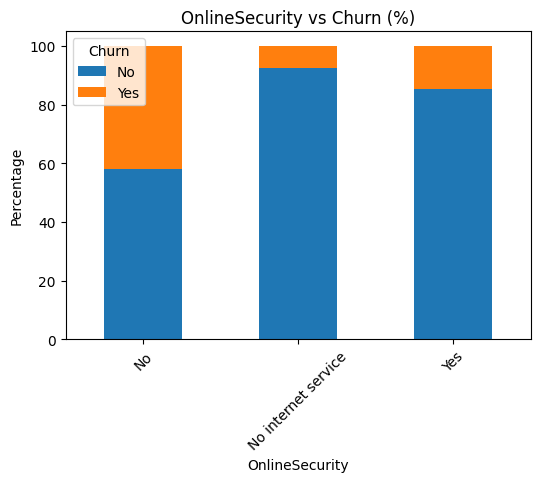

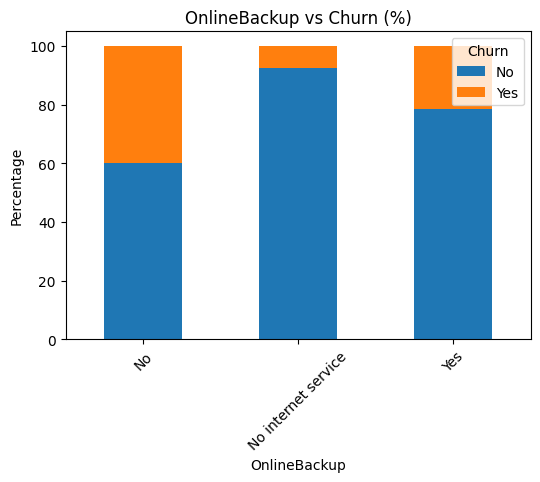

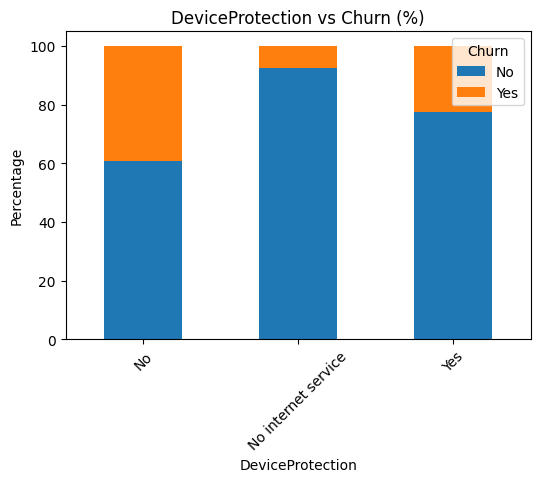

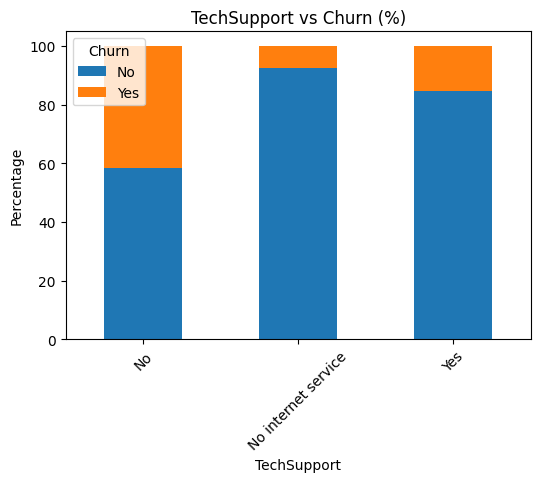

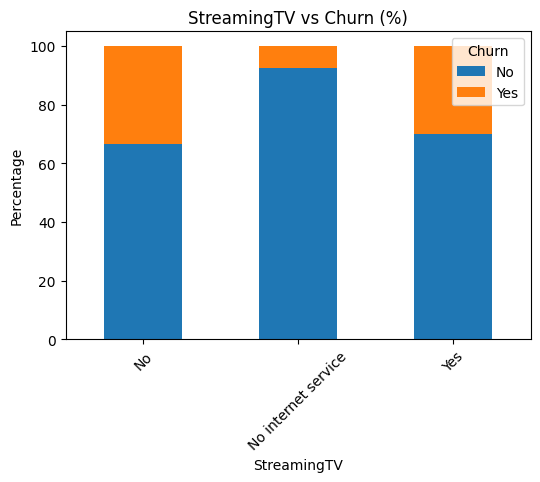

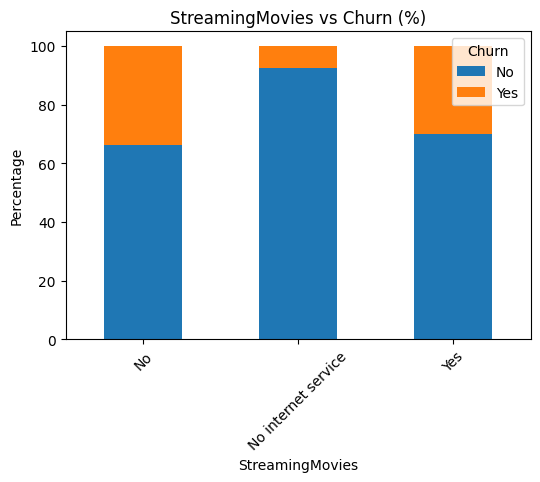

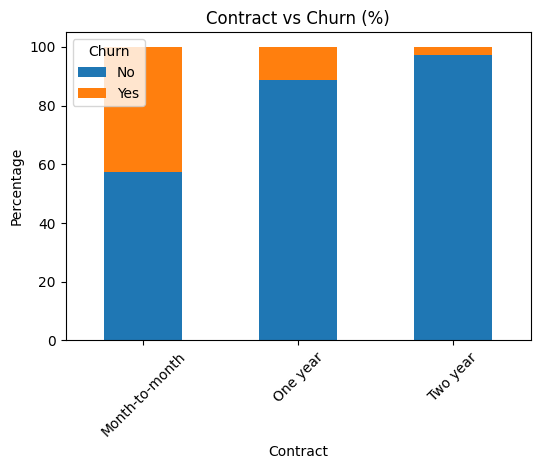

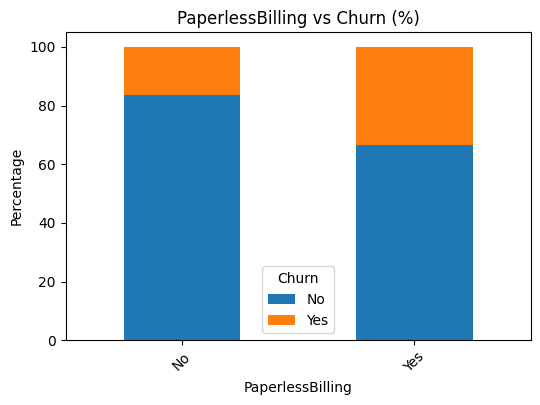

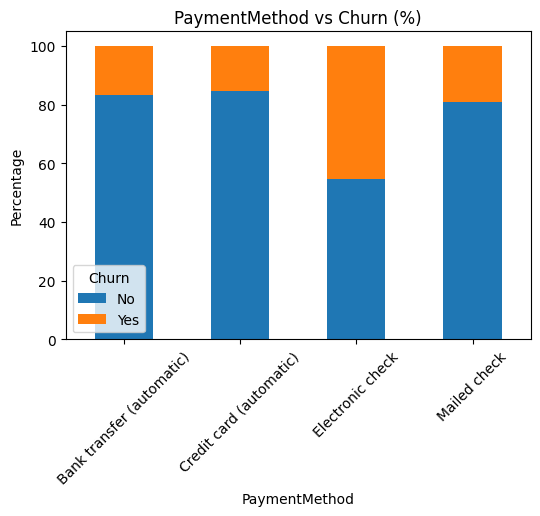

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


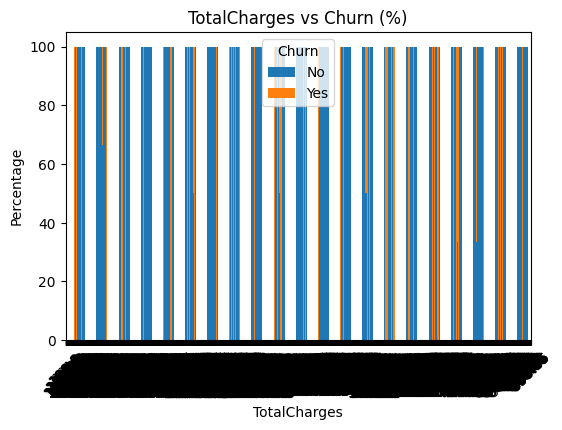

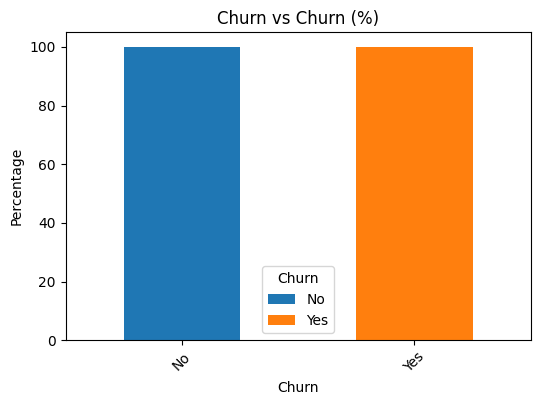

In [10]:
# Categorical Features vs Churn
# Percentage bar plots for categorical features vs Churn
for col in categorical_cols:
    churn_pct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    churn_pct.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f"{col} vs Churn (%)")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.legend(title="Churn")
    plt.show()


# Insights
## From Categorical Plots:
  - Customers who use their 'Internet service' with Fiber optic are likely to churn compared to DSL.
  - Customers with No 'online security' are also likely to churn.
  - Customers with No 'Tech support' are likely to churn.
  Customers with 'Month to Month' contracts churn more than those with 'Two Year' contracts
  - Eletronic check payment method has a much higher churn rate compared to other payment types.